Olá 

Meu nome é Ramon e te ajudarei neste projeto. Fico feliz em rever seu projeto hoje.

Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberta a feedbacks e discussões sobre o tema.

Você encontrará meus comentários abaixo - **por favor, não os mova, modifique ou exclua**.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como esta:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Precisa de correções. O bloqueio requer algumas correções. O trabalho não pode ser aceito com os comentários em vermelho.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


# Prepare um protótipo de um modelo de aprendizado de máquina para o Zyfra

A empresa desenvolve soluções de eficiência para a indústria pesada. O modelo deve prever a quantidade de ouro puro extraído do minério de ouro.

## Iniciação
Carregue bibliotecas que você acredita que são necessárias para o projeto. Você pode perceber depois que você precisa de bibliotecas adicionais conforme você avança, o que é totalmente normal - apenas certifique-se de atualizar essa seção quando perceber isso.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from scipy.stats  import bootstrap
from sklearn.metrics import mean_absolute_error

In [2]:
# Carregue o arquivo com os dados em um DataFrame
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


### Explore os dados iniciais



#### Descrição de dados

##### Processo tecnológico

- `Rougher feed` - matéria-prima
- `Rougher additions (ou aditivos reagentes)` - reagentes de flotação: Xantato, Sulfeto, Depressor
- `Xanthate` - promotor ou ativador da flotação
- `Sulphate` - sulfeto de sódio para este processo específico
- `Depressant` - silicato de sódio
- `Rougher process` - flotação
- `Rougher tails` - resíduos do produto
- `Float banks` - unidade de flotação
- `Cleaner process` - purificação
- `Rougher Au` - concentrado de ouro bruto
- `Final Au` - concentrado de ouro final

##### Parâmetros das etapas
- `air amount` - volume of air — volume de ar
- `fluid levels`
- `feed size` - tamanho de partícula alimentada
- `feed rate`


Agora vamos explorar nossos dados. Você vai querer ver quantas colunas e linhas ele tem, veja algumas linhas para verificar possíveis problemas com os dados.

In [3]:
# vamos exibir as primeiras 5 linhas
gold_recovery_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [4]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [5]:
# vamos exibir as primeiras 5 linhas
gold_recovery_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [6]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [7]:
# vamos exibir as primeiras 5 linhas
gold_recovery_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [8]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


### Verifique se a quantidade retirada foi calculada corretamente. Usando o conjunto de treinamento, calcule a quantidade retirada para a característica rougher.output.recovery. Encontre o EAM entre seus cálculos e os valores das características. Forneça resultados.

In [9]:
gold_recovery_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [10]:
c = gold_recovery_train['rougher.output.concentrate_au']

In [11]:
f = gold_recovery_train['rougher.input.feed_au']

In [12]:
t = gold_recovery_train['rougher.output.tail_au']

In [13]:
gold_recovery_train['rougher.output.withdrawal_au'] = ((c*(f-t))/(f*(c-t)))*100


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [14]:
gold_recovery_train['rougher.output.withdrawal_au']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.withdrawal_au, Length: 16860, dtype: float64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [15]:
erros = np.abs(gold_recovery_train['rougher.output.recovery']-gold_recovery_train['rougher.output.withdrawal_au'])

In [16]:
erros

0        0.000000e+00
1        1.421085e-14
2        1.421085e-14
3        0.000000e+00
4        0.000000e+00
             ...     
16855    0.000000e+00
16856    0.000000e+00
16857    1.421085e-14
16858    0.000000e+00
16859    1.421085e-14
Length: 16860, dtype: float64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [17]:
soma_erros = np.sum(erros)

In [18]:
soma_erros

1.3291789890956807e-10

In [19]:
EAM = soma_erros/len(gold_recovery_train['rougher.output.recovery'])

In [20]:
print("EAM = {:0.15f}".format(EAM))

EAM = 0.000000000000008


Podemos notar que a quantidade retirada foi calculada corretamente em nosso calculo de Erro absoluto médio.O erro médio absoluto dá a média de diferença absoluta entre a predição do modelo e o valor de destino. Que foi inferior a 1%.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


### Analise as características não disponíveis no conjunto de teste. Quais são esses parâmetros? Qual é o tipo deles?

In [21]:
list_train = gold_recovery_train.columns

In [22]:
list_test = gold_recovery_test.columns

In [23]:
iguais = [elemento for elemento in list_test if elemento in list_train]


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [24]:
iguais

['date',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [25]:
deferentes = list(filter(lambda list_train: list_train not in list_test, list_train))


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [26]:
deferentes

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


As características não disponíveis no conjunto de teste são as de parâmetros do produto, as quais são restos de minério bruto, características de cálculo e resultados da purificação.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


### Faça o pré-processamento de dados.

In [27]:
# Verificar Valores Ausentes
((gold_recovery_train.isnull().sum() / gold_recovery_train.shape[0])* 100)

date                                           0.000000
final.output.concentrate_ag                    0.427046
final.output.concentrate_pb                    0.427046
final.output.concentrate_sol                   2.194543
final.output.concentrate_au                    0.421115
                                                ...    
secondary_cleaner.state.floatbank5_b_air       0.504152
secondary_cleaner.state.floatbank5_b_level     0.498221
secondary_cleaner.state.floatbank6_a_air       0.610913
secondary_cleaner.state.floatbank6_a_level     0.504152
rougher.output.withdrawal_au                  13.540925
Length: 88, dtype: float64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [28]:
((gold_recovery_test.isnull().sum() / gold_recovery_test.shape[0])* 100)

date                                          0.000000
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                2.834699
primary_cleaner.state.floatbank8_a_air        0.273224
primary_cleaner.state.floatbank8_a_level      0.273224
primary_cleaner.state.floatbank8_b_air        0.273224
primary_cleaner.state.floatbank8_b_level      0.273224
primary_cleaner.state.floatbank8_c_air        0.273224
primary_cleaner.state.floatbank8_c_level      0.273224
primary_cleaner.state.floatbank8_d_air        0.273224
primary_cleaner.state.floatbank8_d_level      0.273224
rougher.input.feed_ag                         0.273224
rougher.input.feed_pb                         0.273224
rougher.input.feed_rate                       0.683060
rougher.input.feed_size                       0.375683
rougher.input.feed_sol                        1.144126
rougher.in


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [29]:
((gold_recovery_full.isnull().sum() / gold_recovery_full.shape[0])* 100)

date                                          0.000000
final.output.concentrate_ag                   0.391794
final.output.concentrate_pb                   0.382990
final.output.concentrate_sol                  1.694841
final.output.concentrate_au                   0.378588
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.444621
secondary_cleaner.state.floatbank5_b_air      0.444621
secondary_cleaner.state.floatbank5_b_level    0.440218
secondary_cleaner.state.floatbank6_a_air      0.523860
secondary_cleaner.state.floatbank6_a_level    0.444621
Length: 87, dtype: float64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Há poucos valores ausentes, porém, nas maioria da linhas do DataFrame. Para não apagar esses registos iremos substituir com a média segundo as caracteristicas da linha.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [30]:
(((gold_recovery_full.isnull().sum()).sum())*100)/(gold_recovery_full.count()).sum()

1.8862146563523834

In [31]:
(((gold_recovery_test.isnull().sum()).sum())*100)/(gold_recovery_test.count()).sum()

0.7662138645749461

In [32]:
(((gold_recovery_train.isnull().sum()).sum())*100)/(gold_recovery_train.count()).sum()

2.2468139182138507

In [33]:
gold_recovery_train = gold_recovery_train.fillna(method='ffill')
gold_recovery_test = gold_recovery_test.fillna(method='ffill')
gold_recovery_full = gold_recovery_full.fillna(method='ffill')


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto, porém não justificou por que usou ffill
</div>


Valores preenchidos. Agora iremos ver se há valores duplicados e remove-los.

In [34]:
gold_recovery_train.duplicated().sum()

0

In [35]:
gold_recovery_test.duplicated().sum()

0

In [36]:
gold_recovery_full.duplicated().sum()

0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [37]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16860 non-null  float64
 2   final.output.concentrate_pb                         16860 non-null  float64
 3   final.output.concentrate_sol                        16860 non-null  float64
 4   final.output.concentrate_au                         16860 non-null  float64
 5   final.output.recovery                               16860 non-null  float64
 6   final.output.tail_ag                                16860 non-null  float64
 7   final.output.tail_pb                                16860 non-null  float64
 8   final.output.tail_sol                               16860 non-null  float64



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [38]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5856 non-null   float64
 2   primary_cleaner.input.depressant            5856 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 10  primary_clea


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [39]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22716 non-null  float64
 2   final.output.concentrate_pb                         22716 non-null  float64
 3   final.output.concentrate_sol                        22716 non-null  float64
 4   final.output.concentrate_au                         22716 non-null  float64
 5   final.output.recovery                               22716 non-null  float64
 6   final.output.tail_ag                                22716 non-null  float64
 7   final.output.tail_pb                                22716 non-null  float64
 8   final.output.tail_sol                               22716 non-null  float64


DataFrame pré-processador iremos analisar os dados.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


## Analise os dados

###  Observe como a concentração de metais (Au, Ag, Pb) muda dependendo do estágio de purificação

### Compare as distribuições de tamanho de partícula de minério no conjunto de treinamento e no conjunto de teste. Se as distribuições variarem significativamente, a avaliação do modelo estará incorreta.

In [40]:
gold_recovery_train[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141
...,...,...,...,...
16855,5.335862,18.603550,32.940215,46.713954
16856,4.838619,18.441436,32.925325,46.866780
16857,4.525061,15.111231,31.856742,46.795691
16858,4.362781,17.834772,30.770892,46.408188



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [41]:
gold_recovery_train[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599
...,...,...,...,...
16855,6.091855,11.124896,6.559174,3.224920
16856,6.121323,11.425983,6.612376,3.195978
16857,5.970515,8.523497,7.128896,3.109998
16858,6.048130,11.658799,7.490444,3.367241



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [42]:
gold_recovery_train[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511
...,...,...,...,...
16855,4.617558,10.984003,12.445966,11.356233
16856,4.144989,10.888213,12.623947,11.349355
16857,4.020002,8.955135,12.633558,11.434366
16858,3.902537,10.655377,12.012378,11.625587


Observamos acima como cada concetração de metais muda dependendo do estagio do processo de flotação e purificação do ouro.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [43]:
au_size_test = gold_recovery_test['rougher.input.feed_au']
au_size_train = gold_recovery_train['rougher.input.feed_au']

In [44]:
ag_size_test = gold_recovery_test['rougher.input.feed_ag']
ag_size_train = gold_recovery_train['rougher.input.feed_ag']

In [45]:
pb_size_test = gold_recovery_test['rougher.input.feed_pb']
pb_size_train = gold_recovery_train['rougher.input.feed_pb']

Agora iremos compara o tamanho do minério do DataFrame de treinamento para o DataFrame de teste.

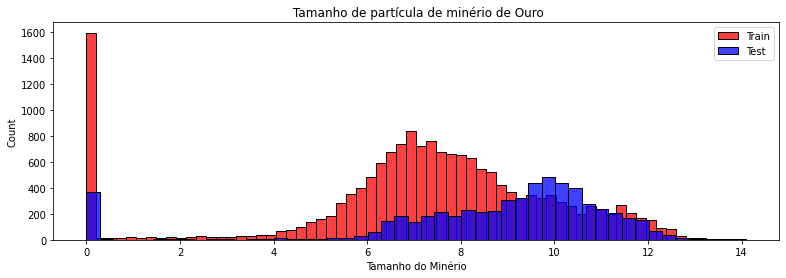

In [46]:
plt.figure(figsize=(13,4));
sns.histplot(data=au_size_train,color = 'red').set(title=" Tamanho de partícula de minério de Ouro");
sns.histplot(data=au_size_test,color = 'blue').set_xlabel('Tamanho do Minério');
plt.legend(labels=["Train","Test"])
plt.show()



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente gráfico
</div>


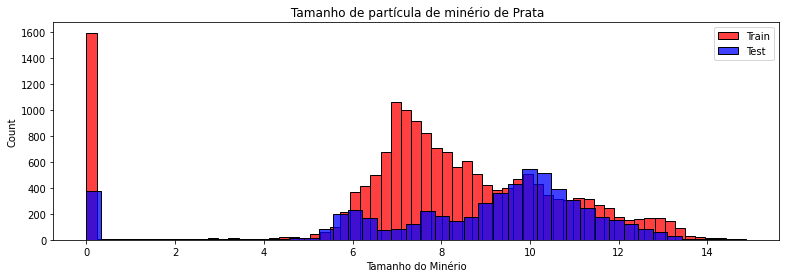

In [47]:
plt.figure(figsize=(13,4));
sns.histplot(data=ag_size_train,color = 'red').set(title=" Tamanho de partícula de minério de Prata");
sns.histplot(data=ag_size_test,color = 'blue').set_xlabel('Tamanho do Minério');
plt.legend(labels=["Train","Test"])
plt.show()



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


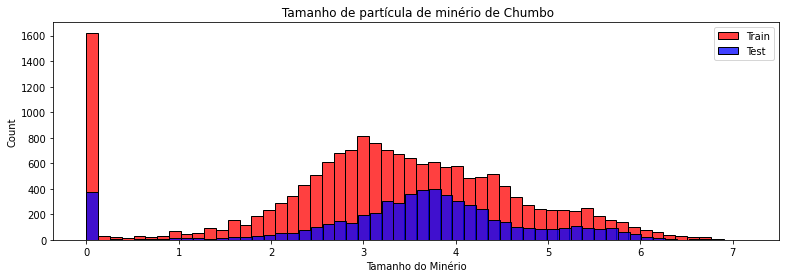

In [48]:
plt.figure(figsize=(13,4));
sns.histplot(data=pb_size_train,color = 'red').set(title=" Tamanho de partícula de minério de Chumbo");
sns.histplot(data=pb_size_test,color = 'blue').set_xlabel('Tamanho do Minério');
plt.legend(labels=["Train","Test"])
plt.show()



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


As distribuições variam significativamente, ocasionando o erro da avaliação do modelo, para resolvermos esse problema, teremos que remover esses 'outliers'.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


### Considere as concentrações totais de todas as substâncias em diferentes estágios: minério bruto, concentrado bruto e concentrado final. Você percebe algum valor anormal na distribuição total? Se você fizer isso, vale a pena remover esses valores de ambas as amostras? Descreva os resultados e elimine as anomalias.

In [49]:
# Removing the outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    return data.loc[data[col].isin(outlier_free_list)]


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você está usando for. Não é necessário. Basta fazer: "data[data[col] >= lower_range & data[col] <= upper_range]"
</div>


In [50]:
#removendo outliers do DataFrame de Treino da substancia Ouro
df_limp_train = removeOutliers(gold_recovery_train,'rougher.input.feed_au')
df_limp_train = removeOutliers(df_limp_train,'rougher.output.concentrate_au')
df_limp_train = removeOutliers(df_limp_train,'final.output.concentrate_au')

In [51]:
#removendo outliers do DataFrame de Treino da substancia Prata
df_limp_train = removeOutliers(df_limp_train,'rougher.input.feed_ag')
df_limp_train = removeOutliers(df_limp_train,'rougher.output.concentrate_ag')
df_limp_train = removeOutliers(df_limp_train,'final.output.concentrate_ag')


In [52]:
#removendo outliers do DataFrame de Treino da substancia Chumbo
df_limp_train = removeOutliers(df_limp_train,'rougher.input.feed_pb')
df_limp_train = removeOutliers(df_limp_train,'rougher.output.concentrate_pb')
df_train = removeOutliers(df_limp_train,'final.output.concentrate_pb')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [53]:
#removendo outliers do DataFrame de Teste da substancia Ouro
df_limp_test = removeOutliers(gold_recovery_test,'rougher.input.feed_au')

In [54]:
#removendo outliers do DataFrame de Teste da substancia Prata
df_limp_test = removeOutliers(df_limp_test,'rougher.input.feed_ag')

In [55]:
#removendo outliers do DataFrame de Teste da substancia Chumbo
df_test = removeOutliers(df_limp_test,'rougher.input.feed_pb')

In [56]:
#removendo outliers do DataFrame Completo da substancia Ouro
df_limp_full = removeOutliers(gold_recovery_full,'rougher.input.feed_au')
df_limp_full = removeOutliers(df_limp_full,'rougher.output.concentrate_au')
df_limp_full = removeOutliers(df_limp_full,'final.output.concentrate_au')

In [57]:
#removendo outliers do DataFrame Completo da substancia Prata
df_limp_full = removeOutliers(df_limp_full,'rougher.input.feed_ag')
df_limp_full = removeOutliers(df_limp_full,'rougher.output.concentrate_ag')
df_limp_full = removeOutliers(df_limp_full,'final.output.concentrate_ag')

In [58]:
#removendo outliers do DataFrame Completo da substancia Chumbo
df_limp_full = removeOutliers(df_limp_full,'rougher.input.feed_pb')
df_limp_full = removeOutliers(df_limp_full,'rougher.output.concentrate_pb')
df_full = removeOutliers(df_limp_full,'final.output.concentrate_pb')

Outliers removidos podemos prosseguir para construção do modelo.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


## Construir o modelo

### Escreva uma função para calcular o valor final sMAPE.

In [59]:
def fun_smape(actual, forecast):
    return 1/len(actual) * np.sum(np.abs(forecast - actual) / ((np.abs(actual) + np.abs(forecast))/2)*100)


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Você pode usar np.mean em vez de np.sum pois evitar a divisaõ
</div>


In [60]:
def fun_smape_final(smape_rougher, smape_final):
    return (0.25*smape_rougher) + (smape_final*0.75)


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


### Treine modelos diferentes. Avalie-os usando validação cruzada. Escolha o melhor modelo e teste-o usando a amostra de teste. Forneça resultados.

In [61]:
#Colocando a coluna 'date' como índice do DataFrame
df_train = df_train.set_index('date')
df_test = df_test.set_index('date')
df_full = df_full.set_index('date')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [62]:
# Criando variáveis para filtragem objetivos e caracteristicas
features = df_test.columns.values
targets = ['rougher.output.recovery','final.output.recovery']

In [63]:
#validação Cruzada do Conjunto de Treino
features_train = df_train[features].reset_index(drop=True)
target_train = df_train[targets].reset_index(drop=True)
target_train.columns = [0, 1]

In [64]:
target_train

,0,1
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
12323,89.574376,73.755150
12324,87.724007,69.049291
12325,88.890579,67.002189
12326,89.858126,65.523246



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [65]:
# Conjunto de Teste
features_test = df_test[features].reset_index(drop=True)
target_test = df_full[targets].filter(items = df_test.index, axis=0).reset_index(drop=True)
target_test.columns = [0, 1]

In [66]:
target_test

,0,1
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,83.236367,61.467078
4,79.613867,57.124195
...,...,...
4678,95.172585,68.919891
4679,94.575036,68.440582
4680,93.018138,67.092759
4681,92.599042,68.061186


<s>
<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Não existe validação cruzada no teste. O teste é usado apenas para reportar resultados
</div>


Agora iremos criar o modelo.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Escolhemos a regressão linear pois nossas caracteristicas são numéricas, além de ser o modelo com melhor desempenho em nosso modelo.

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
#Criando modelo e treinando nosso conjunto de Treinamento
model = LinearRegression()
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [69]:
predictions_test

array([[86.60736902, 71.99984333],
       [86.63945374, 70.71679287],
       [86.8736464 , 71.58026579],
       ...,
       [91.77177579, 73.98914926],
       [92.1788791 , 75.05088104],
       [91.16528895, 74.07785176]])

<s>
<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Incorreto. Treinamos no conjunto de treino. Validação é usado para calibrar hiperparâmetro. Teste é usado apenas para reportar o resultado. Você tem de usar aqui o modelo treinado com conjunto de treino
</div>



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [70]:
predictions_test = pd.DataFrame(predictions_test)

In [71]:
predictions_test_rougher = predictions_test[0]
predictions_test_final = predictions_test[1]

In [72]:
actual_test_rougher = target_test[0]
actual_test_final = target_test[1]


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Com o nosso modelo treinado com a amostra teste e preparado para usar nossa métrica Smape iremos ver nossos resultados.

In [73]:
#Aplicando a fórmula ao nossos resultados de Minério Bruto
smape_rougher = fun_smape(actual_test_rougher, predictions_test_rougher)
smape_rougher

6.140100638423788


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [74]:
#Aplicando a fórmula ao nossos resultados de Minério Final
smape_final =  fun_smape(actual_test_final, predictions_test_final)
smape_final

8.405150108302912


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [75]:
#Aplicando a fórmula do sMape
fun_smape_final(smape_rougher, smape_final)

7.8388877408331314


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


O nosso erro percentual absoluto médio simétrico final é de 7.83% em nossa modelo.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


## Conclusão

Neste projeto, importamos bibliotecas como "pandas" e "numpy" que habitualmente já utilizamos, sklearn para criação do nosso modelo, "Seaborn" para representação em gráficos.

Realizamos o pre-processamento, para que não tivesse acontecido algum problema na criação do nosso modelo.

E desenvolvemos um protótipo de um modelo de aprendizado de máquina. Usamos Regressão Linear para realizar uma predição para a quantidade de ouro puro extraído do minério de ouro. Além aplicar a métrica sMape para verificar a porcetagem do erro percentual absoluto médio simétrico. 

<s>
<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões.
    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Erro ao treinar modelo no conjunto de validação. Ver explicação que deixei e corrigir.</span>
 

Portanto, sugiro que você corrija os pontos indicados.
    
Bom trabalho.
</div>



<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Você finalizou mais um projeto. Parabéns.
</div>
